**Giang Pham**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 6B: Naive Bayes and K-Nearest Neighbor

In this lab we will be using the library scikit-learn to train a Gaussian Naive Bayes classifier and graph the results.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, preprocessing, model_selection, decomposition
from sklearn import neighbors, naive_bayes, metrics
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

/var/folders/v7/nzjlbc216sb004j2tns6vw_00000gn/T/ipykernel_97512/733670150.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
/var/folders/v7/nzjlbc216sb004j2tns6vw_00000gn/T/ipykernel_97512/733670150.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


## Task 1: Load the digits dataset

We're going to be seeing if we can use Naive Bayes and K-Nearest Neighbor to classify hand writing data.  The [digits dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html) is a set of 1797 8x8 pixel images, representing handwriting samples of the numbers 0-9.  This is just a small sample of the [MNIST handwriting dataset](http://yann.lecun.com/exdb/mnist/).

1. Load the [digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Use the `return_X_y` parameter so that it returns both the X data and y classifications.
2. Use [train test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the X data and y classifications, into an X_training dataset, X_testing dataset and the corresponding y_training labels and y_testing labels.  Set the test size be .3 and shuffle to True.
4. Print the shape of X_training, X_testing, y_training, and y_testing.

In [10]:
np.random.seed(42)
x,y = datasets.load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3,shuffle=True)
print("x train:", np.array(x_train).shape)
print("x test:",np.array(x_test).shape)

print("y train:",np.array(y_train).shape)
print("y test:",np.array(y_test).shape)

# Your code here

print( "Expected output")
print('''
X training data shape:  (1257, 64)
X testing data shape:   (540, 64)
y training labels shape:(1257,)
y testing labels shape: (540,)
''')

x train: (1257, 64)
x test: (540, 64)
y train: (1257,)
y test: (540,)
Expected output

X training data shape:  (1257, 64)
X testing data shape:   (540, 64)
y training labels shape:(1257,)
y testing labels shape: (540,)



## Task 2: Create Classifiers and Calculate Accuracy

### Create a Naive Bayes Classifier
1. Create a [Gaussian Naive Bayes Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) [(More Info)](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes). 
2. Use the fit method with the training dataset as X and the y training dataset labels as the target.
3. Calculate the accuracy of the classifier with the test data and test dataset labels using the score method.
4. Print the accuracy of the Naive Bayes classifier.

### Create a K-NN Classifier
1. Using the lab from last week as reference, create a [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) [(More Info)](https://scikit-learn.org/stable/modules/neighbors.html#classification).  Set n_neighbors equal to 7.
1. Assign your classifier to a variable with a **different** name than your Naive Bayes classifier.  
2. Use the fit method with the training dataset as X and the y training dataset labels as the target.
3. Calculate the accuracy of the classifier with the test data and test dataset labels using the score method.
4. Print the accuracy of the K-NN classifier.


In [11]:
# Your code here
gnb = naive_bayes.GaussianNB()
gnb.fit(x_train, y_train)
print("Gaussian Naive Bayes Classifier Accuracy:", gnb.score(x_test, y_test))

knn = neighbors.KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
print("K-Nearest Neighbor Classifier Accuracy: ",knn.score(x_test, y_test))

print( "Expected output")
print('''
Gaussian Naive Bayes Classifier Accuracy: 0.85185...
K-Nearest Neighbor Classifier Accuracy:   0.99074...
''')

Gaussian Naive Bayes Classifier Accuracy: 0.8518518518518519
K-Nearest Neighbor Classifier Accuracy:  0.9907407407407407
Expected output

Gaussian Naive Bayes Classifier Accuracy: 0.85185...
K-Nearest Neighbor Classifier Accuracy:   0.99074...



## Task 3: Create a confusion matrix for each classifier

1. Find the predicted labels for the X test data using the predict method for the Naive Bayes classifier and K-NN classifier.
1. Create a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) for each classifier, using the predicted labels and actual labels.  
1. Print the confusion matrices, along with some indication that the rows indicate the number of points that truly have a given label and that the columns indicate the number of points predicted to have that label.
2. Visualize the confusion matrices using imshow. For reference, use Lab 4a and this [matplotlib example](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html) of an annotated heatmap.
    1. Set x_ticks and y_ticks to align with the list of digits.
    2. Use imshow to draw the matrix
    3. Choose a perceptually uniform [colormap](https://matplotlib.org/tutorials/colors/colormaps.html)
    3. Use a colorbar to label the matrix
    4. Remember to call `plt.show()` at the end, or other plots later might not work.
    5. Give your plot a meaningful title.
    
#### Review Question: Which digits are most likely to be misclassified and what are they most likely to be misclassified as?

In [14]:
# Your code goes here
ypred_nb = gnb.predict(x_test)
ypred_knn = knn.predict(x_test)

nb_confuse = metrics.confusion_matrix(y_test, ypred_nb)
knn_confuse = metrics.confusion_matrix(y_test, ypred_knn)

print("(rows indicate true class count, columns indicate predicted class count)")
print("K-Nearest Neighbor Confusion Matrix, \n", knn_confuse)
print("Gaussian Naive Bayes Confusion Matrix, \n", nb_confuse)

print("Expected output (rows indicate true class count, columns indicate predicted class count)")
print('''
K-Nearest Neighbor Confusion Matrix
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 64  1  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  1  1  1  0  0  0 56]]
 Gaussian Naive Bayes Confusion Matrix
[[52  0  0  0  0  0  0  1  0  0]
 [ 0 37  2  0  0  0  0  2  6  3]
 [ 0  3 31  0  0  0  1  0 12  0]
 [ 0  0  2 41  0  0  1  0  8  2]
 [ 0  0  0  0 51  0  2  7  0  0]
 [ 0  0  0  1  0 62  1  2  0  0]
 [ 0  0  0  0  1  1 51  0  0  0]
 [ 0  0  0  0  0  1  0 54  0  0]
 [ 0  2  0  0  0  0  0  2 39  0]
 [ 0  1  1  1  0  2  1  7  4 42]]
''')


(rows indicate true class count, columns indicate predicted class count)
K-Nearest Neighbor Confusion Matrix, 
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 64  1  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  1  1  1  0  0  0 56]]
Gaussian Naive Bayes Confusion Matrix, 
 [[52  0  0  0  0  0  0  1  0  0]
 [ 0 37  2  0  0  0  0  2  6  3]
 [ 0  3 31  0  0  0  1  0 12  0]
 [ 0  0  2 41  0  0  1  0  8  2]
 [ 0  0  0  0 51  0  2  7  0  0]
 [ 0  0  0  1  0 62  1  2  0  0]
 [ 0  0  0  0  1  1 51  0  0  0]
 [ 0  0  0  0  0  1  0 54  0  0]
 [ 0  2  0  0  0  0  0  2 39  0]
 [ 0  1  1  1  0  2  1  7  4 42]]
Expected output (rows indicate true class count, columns indicate predicted class count)

K-Nearest Neighbor Confusion Matrix
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0

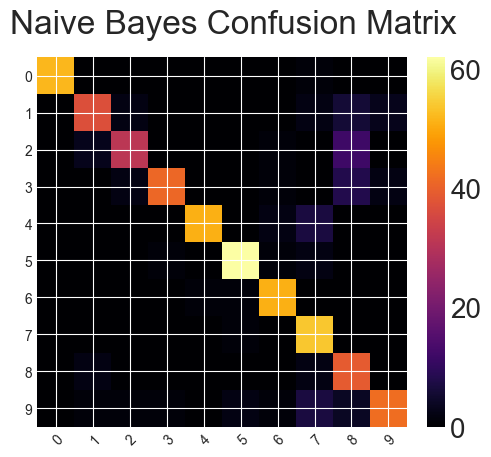

In [34]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots()
im_nb = ax.imshow(nb_confuse, cmap = 'inferno')
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))

ax.set_xticklabels(np.arange(10), size = 10)
ax.set_yticklabels(np.arange(10), size = 10)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

fig.suptitle("Naive Bayes Confusion Matrix")
plt.colorbar(im_nb, cax=cax)
plt.show()


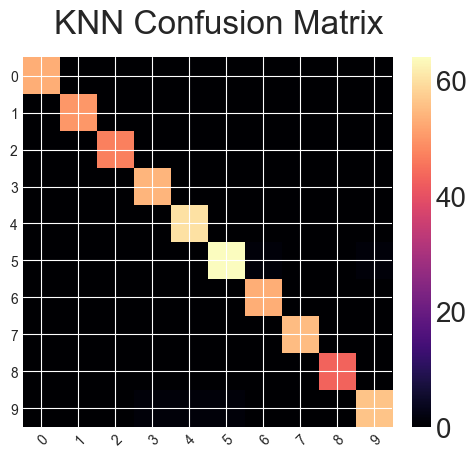

In [35]:
fig, ax = plt.subplots()
im_knn = ax.imshow(knn_confuse, cmap = "magma")
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))

ax.set_xticklabels(np.arange(10), size = 10)
ax.set_yticklabels(np.arange(10), size = 10)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

fig.suptitle("KNN Confusion Matrix")
plt.colorbar(im_knn, cax=cax)
plt.show()


**Review Question: Which digits are most likely to be misclassified and what are they most likely to be misclassified as**?

**Answer**: 
2 are often misclassified as 8, 3 are also often misclassified as 8